# PROBLEMA DE NEGÓCIO

***Nosso cliente é uma seguradora que oferece Seguro Saúde aos seus clientes, agora eles precisam da sua ajuda na construção de um modelo para prever se os segurados (clientes) do ano passado também terão interesse no Seguro Automóvel oferecido pela empresa.

**Uma apólice de seguro é um acordo pelo qual uma empresa se compromete a fornecer uma garantia de compensação por perdas, danos, doenças ou morte específicos em troca do pagamento de um prêmio específico. Um prêmio é uma quantia em dinheiro que o cliente precisa pagar regularmente a uma seguradora por esta garantia.

**Por exemplo, você pode pagar um prêmio de Rs. 5.000 por ano para uma cobertura de seguro saúde de Rs. 200.000/- para que se, Deus me livre, você adoecer e precisar ser hospitalizado naquele ano, a seguradora arcará com o custo da hospitalização, etc., por até Rs. 200.000. Agora, se você está se perguntando como uma empresa pode arcar com custos de hospitalização tão altos quando cobra um prêmio de apenas Rs. 5000/-, é aí que o conceito de probabilidades entra em cena. Por exemplo, como você, pode haver 100 clientes que pagariam um prêmio de Rs. 5.000 todos os anos, mas apenas alguns deles (digamos 2-3) seriam hospitalizados naquele ano e nem todos. Dessa forma, todos compartilham o risco de todos os outros.

**Assim como o seguro médico, existe o seguro automóvel, onde todos os anos o cliente precisa pagar um prêmio de determinado valor à seguradora para que, em caso de acidente infeliz com o veículo, a seguradora forneça uma indenização (chamada de 'soma assegurada' ) Para o consumidor.

**Construir um modelo para prever se um cliente estaria interessado em seguro automóvel é extremamente útil para a empresa porque ela pode então planear a sua estratégia de comunicação para chegar a esses clientes e optimizar o seu modelo de negócio e receitas.

**Agora, para prever se o cliente estaria interessado em seguro de veículos, você tem informações sobre dados demográficos (sexo, idade, tipo de código de região), veículos (idade do veículo, danos), apólice (prêmio, canal de fornecimento) etc.

# IMPORTAÇÃO DE DADDS E PRIMEIRAS VISUALIZAÇÕES

In [2]:
#Importação de pacotes
import warnings
import pandas as pd
df = pd.read_csv('train.csv',thousands= " ")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import joblib # Utilizado para salvar o modelo preditivo
from sklearn.preprocessing import LabelEncoder #Utilizada para fazer o OneHotEncoding
from sklearn.metrics import mean_squared_error,precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
from imblearn import under_sampling, over_sampling #Utilizada para fazer o balanceamento de dados
from imblearn.over_sampling import SMOTE #Utilizada para fazer o balanceamento de dados
from sklearn.preprocessing import MinMaxScaler #Utilizada para fazer a padronização dos dados
from sklearn.metrics import r2_score # Utilizado para medir a acuracia do modelo preditivo
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV 
import time
warnings.filterwarnings("ignore") 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#pd.options.display.float_format = '{:.2f}'.format

In [3]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
df.shape

(381109, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


# TRADUÇÃO DA BASE DE DADOS

In [6]:
df_traduzida = df.rename(columns={'Gender':'Sexo','Age':'Idade','Driving_License':'CartaCondução','Region_Code':'CódigoRegião','Previously_Insured':'Seguro','Vehicle_Age':'IdadeVeículo','Vehicle_Damage':'VeiculoDanificado','Annual_Premium':'ValorPagarAno','Policy_Sales_Channel':'PolíticaCanal','Vintage':'DiasAssociado','Response':'Resposta'})
df_traduzida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 381109 non-null  int64  
 1   Sexo               381109 non-null  object 
 2   Idade              381109 non-null  int64  
 3   CartaCondução      381109 non-null  int64  
 4   CódigoRegião       381109 non-null  float64
 5   Seguro             381109 non-null  int64  
 6   IdadeVeículo       381109 non-null  object 
 7   VeiculoDanificado  381109 non-null  object 
 8   ValorPagarAno      381109 non-null  float64
 9   PolíticaCanal      381109 non-null  float64
 10  DiasAssociado      381109 non-null  int64  
 11  Resposta           381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


# TRATAMENTO E MANIPULAÇÃO DE DADOS

In [7]:
# EXCLUIT COLUNAS QUE NÃO SERÃO ÚTEIS

del df_traduzida['id']

In [8]:
#df_traduzida['IdadeVeículo'] = pd.to_numeric(df_traduzida["IdadeVeículo"].str.replace(">"," ").str.replace('<' ,'').str.replace('Years', '').str.replace('- ', '').str.replace(" ", '').str.replace("1-2Year", '').str.replace("1Year", ''),downcast="float")

### TRATANDO VALORES NULOS E VALORES DUPLICADOS 

In [9]:
(df_traduzida.isnull().sum() / len(df_traduzida['Sexo']))*100

Sexo                 0.0
Idade                0.0
CartaCondução        0.0
CódigoRegião         0.0
Seguro               0.0
IdadeVeículo         0.0
VeiculoDanificado    0.0
ValorPagarAno        0.0
PolíticaCanal        0.0
DiasAssociado        0.0
Resposta             0.0
dtype: float64

In [10]:
df_traduzida.duplicated().sum()

269

In [11]:
df_traduzida = df_traduzida.drop_duplicates()

# ANÁLISE EXPLORATÓRIA

## ESTATÍSTICA

In [12]:
df_traduzida.describe()

,Idade,CartaCondução,CódigoRegião,Seguro,ValorPagarAno,PolíticaCanal,DiasAssociado,Resposta
count,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000
mean,38.823593,0.997868,26.388307,0.458208,30584.016078,112.030225,154.344607,0.122584
std,15.513206,0.046126,13.229907,0.498251,17203.258664,54.206194,83.670240,0.327960
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24426.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31678.500000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39408.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### MODA

In [13]:
from statistics import mode

mode(df_traduzida['Idade'])

24

In [14]:
mode(df_traduzida['CartaCondução'])

1

In [15]:
mode(df_traduzida['Seguro'])

0

In [16]:
mode(df_traduzida['ValorPagarAno'])

2630.0

In [17]:
mode(df_traduzida['PolíticaCanal'])

152.0

In [18]:
mode(df_traduzida['DiasAssociado'])

256

In [19]:
mode(df_traduzida['Resposta'])

0

### ASSIMETRIA

In [20]:
df_traduzida['Idade'].skew()

0.6724953423629682

In [21]:
df_traduzida['CartaCondução'].skew()

-21.58750995371246

In [22]:
df_traduzida['Seguro'].skew()

0.16775498710028985

In [23]:
df_traduzida['ValorPagarAno'].skew()

1.7699758877598497

In [24]:
df_traduzida['DiasAssociado'].skew()

0.00305128680797489

In [25]:
df_traduzida['Resposta'].skew()

2.3016091530787497

### CURTOSE

In [26]:
df_traduzida['Idade'].kurt()

-0.5659837829761241

In [27]:
df_traduzida['CartaCondução'].kurt()

464.023022841344

In [28]:
df_traduzida['Seguro'].kurt()

-1.9718686196956465

In [29]:
df_traduzida['ValorPagarAno'].kurt()

34.10301190861813

In [30]:
df_traduzida['DiasAssociado'].kurt()

-1.2006124632989013

In [31]:
df_traduzida['Resposta'].kurt()

3.297422010082246

### HISTOGRAMA

array([[<Axes: title={'center': 'Idade'}>,
        <Axes: title={'center': 'CartaCondução'}>,
        <Axes: title={'center': 'CódigoRegião'}>],
       [<Axes: title={'center': 'Seguro'}>,
        <Axes: title={'center': 'ValorPagarAno'}>,
        <Axes: title={'center': 'PolíticaCanal'}>],
       [<Axes: title={'center': 'DiasAssociado'}>,
        <Axes: title={'center': 'Resposta'}>, <Axes: >]], dtype=object)

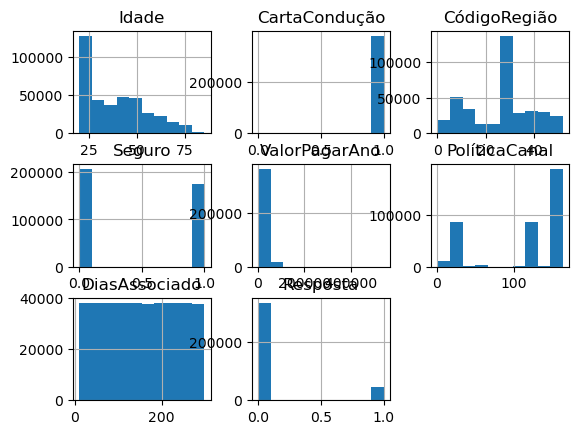

In [32]:
df_traduzida.hist()

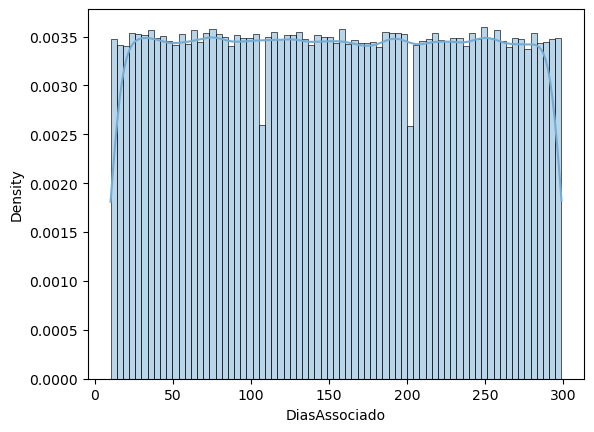

In [33]:
ax = sns.histplot(df_traduzida.DiasAssociado, stat="density", kde=True, color='#74acd4', lw=1)

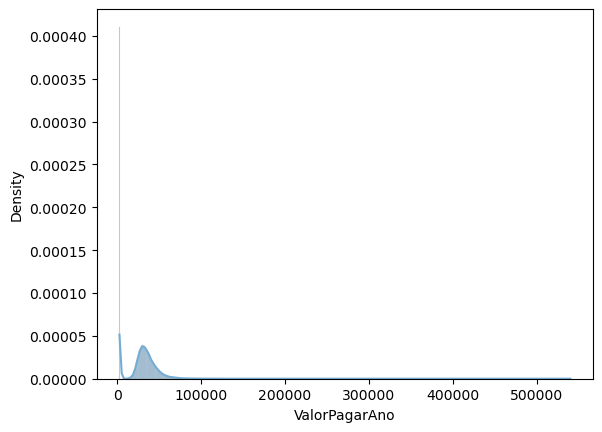

In [34]:
ax = sns.histplot(df_traduzida.ValorPagarAno, stat="density", kde=True, color='#74acd4', lw=1)

### VERIFICANDO SE HÁ CORRELAÇÃO NAS VARIAVEIS

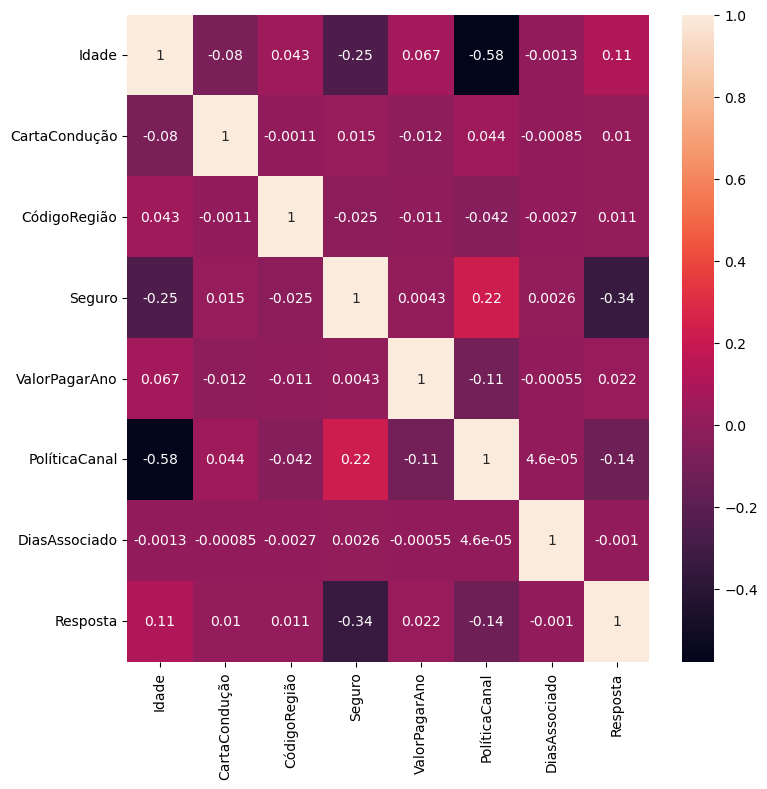

In [35]:
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20
plt.rcParams["figure.figsize"] = [8.00, 8.00]
plt.rcParams["figure.autolayout"] = True
sns.heatmap(df_traduzida.corr(), annot=True)
plt.show()

### VALORES ÚNICO EM CADA VARIAVEL

In [36]:
valores_unicos = []
for i in df_traduzida.columns[0:12].tolist():
    print(i, ':', len(df_traduzida[i].astype(str).value_counts()))
    valores_unicos.append(len(df_traduzida[i].astype(str).value_counts()))

Sexo : 2
Idade : 66
CartaCondução : 2
CódigoRegião : 53
Seguro : 2
IdadeVeículo : 3
VeiculoDanificado : 2
ValorPagarAno : 48838
PolíticaCanal : 155
DiasAssociado : 290
Resposta : 2


## verificação de outliers 

Idade : int64
CartaCondução : int64
CódigoRegião : float64
Seguro : int64
ValorPagarAno : float64
PolíticaCanal : float64
DiasAssociado : int64
Resposta : int64


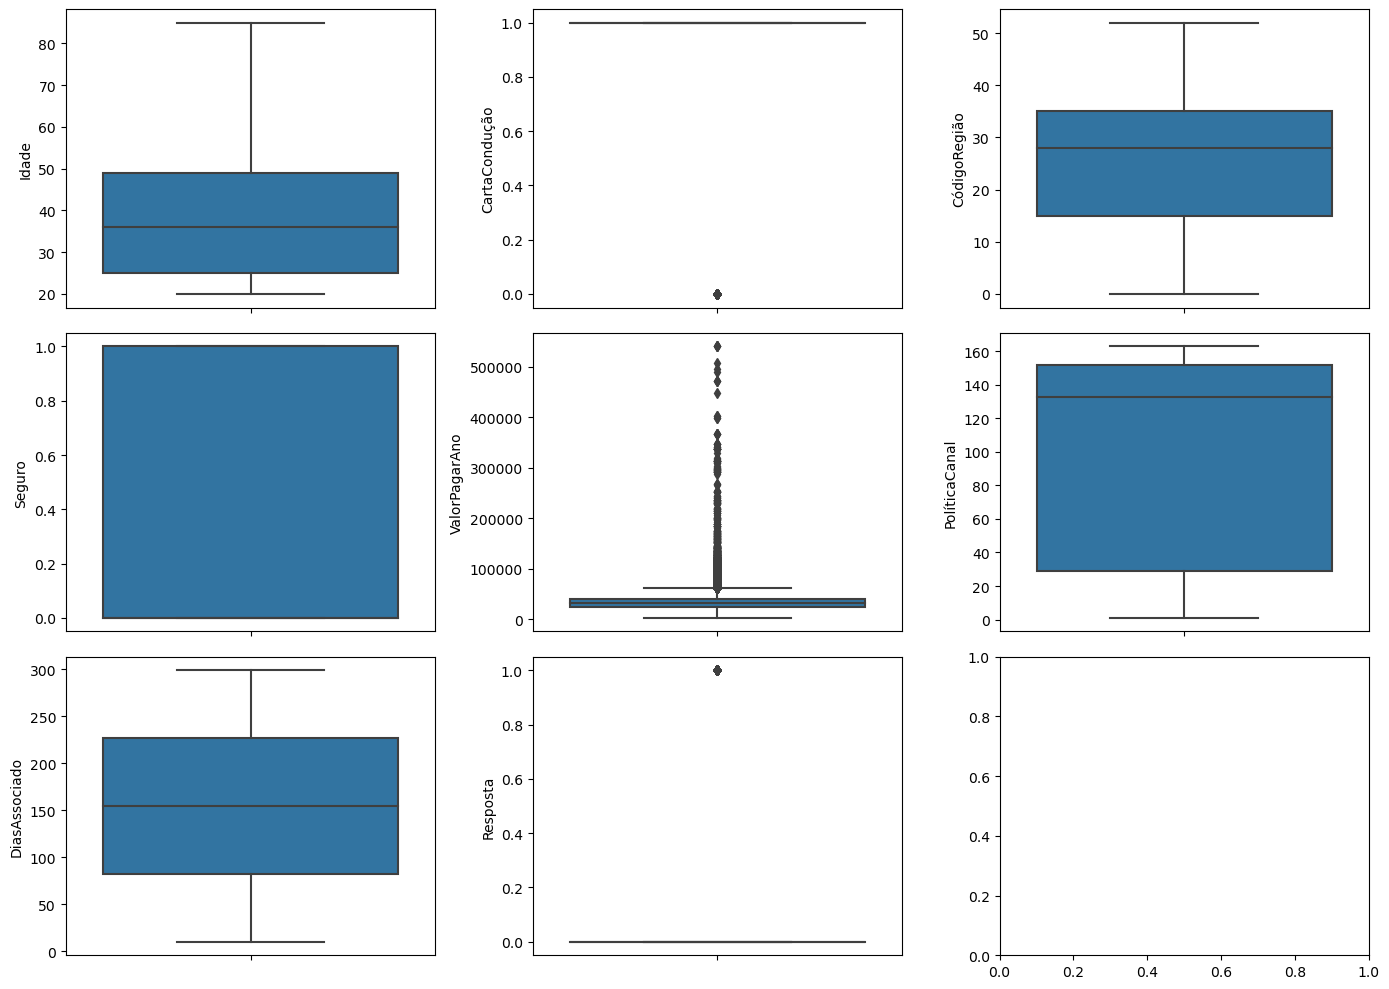

In [37]:
variaveis_numericas = []
for i in df_traduzida.columns[0:16].tolist():
        if df_traduzida.dtypes[i] == 'int64' or df_traduzida.dtypes[i] == 'float64':            
            print(i, ':' , df_traduzida.dtypes[i]) 
            variaveis_numericas.append(i)
 
    
    
    
plt.rcParams["figure.figsize"] = [14.00, 10.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20

f, axes = plt.subplots(3, 3) #8 linhas e 4 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = df_traduzida, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 3:
        linha += 1
        coluna = 0            

plt.show() 

### ANÁLISE EXPLORATÓRIA DOS DADOS COM PYGWALKER

In [38]:
#!pip install pygwalker -q
import pygwalker as pyg
pyg.walk(df_traduzida)

Box(children=(HTML(value='<div id="ifr-pyg-0" style="height: auto">\n    <head>\n        <meta http-equiv="Con…

# ANÁLISE DE DADOS 

In [39]:
df_traduzida.head()

,Sexo,Idade,CartaCondução,CódigoRegião,Seguro,IdadeVeículo,VeiculoDanificado,ValorPagarAno,PolíticaCanal,DiasAssociado,Resposta
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### AGRUPAMENTO DOS DADOS 

In [40]:
df_traduzida.groupby(df_traduzida['Sexo']).size()

Sexo
Female    174902
Male      205938
dtype: int64

In [41]:
df_traduzida.groupby(df_traduzida['Idade']).size()

Idade
20     6227
21    16452
22    20956
23    24239
24    25939
25    20620
26    13520
27    10748
28     8965
29     7428
30     6254
31     5507
32     4997
33     5010
34     4894
35     4932
36     5063
37     5404
38     5706
39     6452
40     7162
41     7725
42     7995
43     8423
44     8350
45     8178
46     7872
47     7344
48     7105
49     6613
50     6258
51     5911
52     5586
53     5328
54     4993
55     4490
56     4062
57     3943
58     3821
59     3610
60     3533
61     3340
62     3101
63     3084
64     2850
65     2788
66     2724
67     2624
68     2440
69     2529
70     2347
71     2051
72     2035
73     1924
74     1832
75     1605
76     1395
77     1388
78     1216
79      914
80      909
81       56
82       29
83       22
84       11
85       11
dtype: int64

In [42]:
df_traduzida.groupby(df_traduzida['CartaCondução']).size()

CartaCondução
0       812
1    380028
dtype: int64

In [43]:
df_traduzida.groupby(df_traduzida['Seguro']).size()

Seguro
0    206336
1    174504
dtype: int64

In [44]:
df_traduzida.groupby(df_traduzida['IdadeVeículo']).size()

IdadeVeículo
1-2 Year     200167
< 1 Year     164671
> 2 Years     16002
dtype: int64

In [45]:
df_traduzida.groupby(df_traduzida['VeiculoDanificado']).size()

VeiculoDanificado
No     188563
Yes    192277
dtype: int64

In [46]:
df_traduzida.groupby(df_traduzida['Resposta']).size()

Resposta
0    334155
1     46685
dtype: int64

### PLOTANDO EM UM GRAFICO

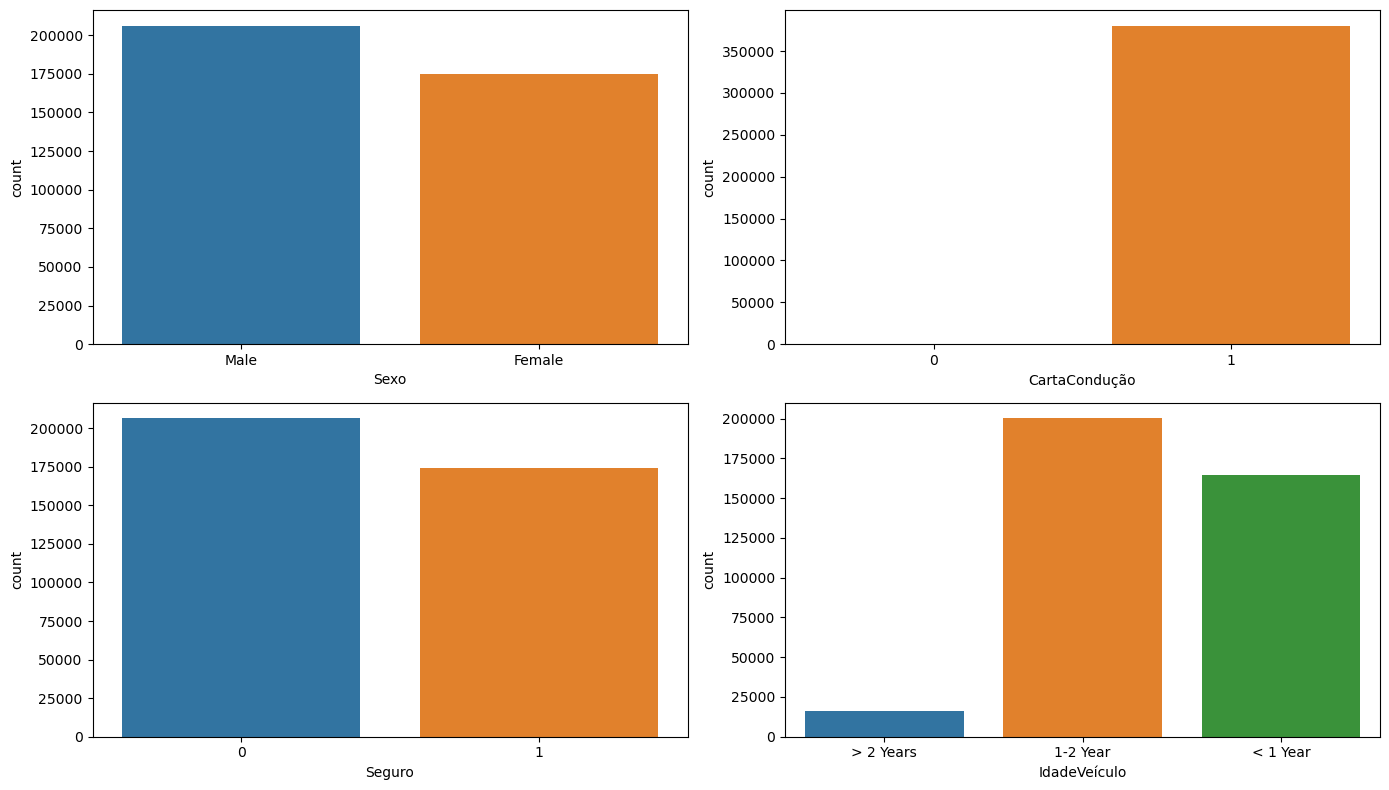

In [47]:
# Podemos observar as informações acimas todas de uma vez através de gráficos

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = df_traduzida, x="Sexo", ax=axes[0][0])
sns.countplot(data = df_traduzida, x="CartaCondução", ax=axes[0][1])
sns.countplot(data = df_traduzida, x="Seguro", ax=axes[1][0])
sns.countplot(data = df_traduzida, x="IdadeVeículo", ax=axes[1][1])

plt.show()

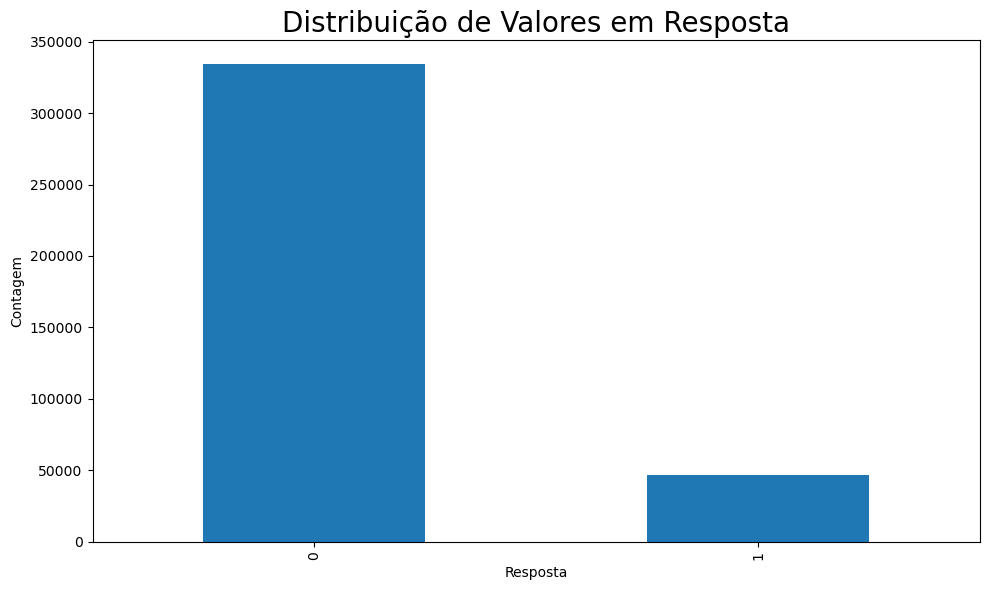

In [48]:

coluna = 'Resposta'

contagem_valores = df_traduzida[coluna].value_counts()

# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
contagem_valores.plot(kind='bar')
plt.title(f'Distribuição de Valores em {coluna}')
plt.xlabel(coluna)
plt.ylabel('Contagem')
plt.show()


### SEGMENTANDO AS PESSOAS QUE TIVERAM E NÃO TIVERAM INTERESSE NO SEGURO

### interessados

In [49]:
interessados = df_traduzida.loc[df_traduzida['Resposta'] == 0]
interessados.head()

,Sexo,Idade,CartaCondução,CódigoRegião,Seguro,IdadeVeículo,VeiculoDanificado,ValorPagarAno,PolíticaCanal,DiasAssociado,Resposta
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0


### desinteressados

In [50]:
desinteressados = df_traduzida.loc[df_traduzida['Resposta'] == 1]
desinteressados.head()

,Sexo,Idade,CartaCondução,CódigoRegião,Seguro,IdadeVeículo,VeiculoDanificado,ValorPagarAno,PolíticaCanal,DiasAssociado,Resposta
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
7,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
10,Female,47,1,35.0,0,1-2 Year,Yes,47576.0,124.0,46,1
15,Male,37,1,6.0,0,1-2 Year,Yes,2630.0,156.0,147,1


## SEGMENTANDO A FAIXA ETARIA DAS IDADES PARA A ANÁLISE 

### JOVENS QUE TIVERAM INTERESSE NO SEGURO

In [51]:
jovens  = interessados[interessados['Idade']<=29] 
jovens['Idade'].value_counts().sum()

148720

### ANALSIANDO POR SEXO 

In [52]:
sexo = jovens.groupby(["Sexo"]).count()["Idade"].rename('QuantidadeSexo')
cart = jovens.groupby(['Sexo']).sum()['CartaCondução'].rename('SomaCarteira')
carmedia =jovens.groupby(['Sexo']).mean()['CartaCondução'].rename('MédiaCarteira')
seguro = jovens.groupby(['Sexo']).sum()['Seguro'].rename('SomaSeguro')
mediaseguro = jovens.groupby(['Sexo']).mean()['Seguro'].rename('MédiaSeguro')
total = jovens.groupby(['Sexo']).sum()['ValorPagarAno'].rename('SomaTotal')
mediatotal = jovens.groupby(['Sexo']).median()['ValorPagarAno'].rename('MédiaTotal')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaCarteira':cart,'MédiaCarteira':carmedia,'SomaSeguro':seguro,'MédiaSeguro':mediaseguro,'SomaTotal':total,'MédiaTotal':mediatotal})
dados_usuarios ['SomaTotal'] = dados_usuarios['SomaTotal'].map("${:,.2f}".format)
dados_usuarios ["MédiaTotal"] = dados_usuarios["MédiaTotal"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaCarteira,MédiaCarteira,SomaSeguro,MédiaSeguro,SomaTotal,MédiaTotal
Sexo,,,,,,,
Female,83145,83144,0.999988,57729,0.694317,"$2,505,250,604.00","$30,340.00"
Male,65575,65573,0.999970,44215,0.674266,"$1,994,096,855.00","$30,934.00"


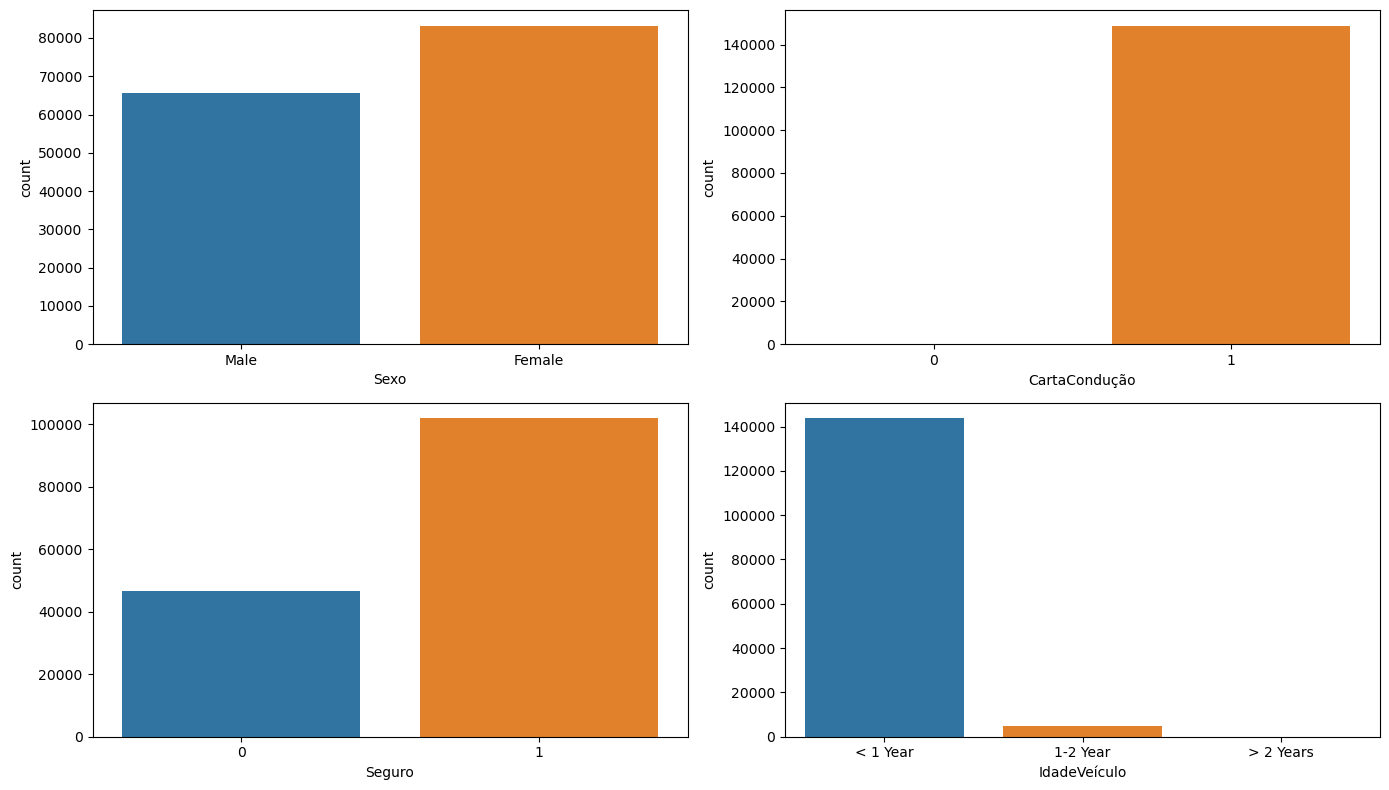

In [53]:
# Podemos observar as informações acimas todas de uma vez através de gráficos

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = jovens, x="Sexo", ax=axes[0][0])
sns.countplot(data = jovens, x="CartaCondução", ax=axes[0][1])
sns.countplot(data = jovens, x="Seguro", ax=axes[1][0])
sns.countplot(data = jovens, x="IdadeVeículo", ax=axes[1][1])

plt.show()

### ANALISANDO POR TEMPO DE VIDA DO CARRO

In [54]:
sexo = jovens.groupby(["IdadeVeículo"]).count()["Idade"].rename('QuantidadeSexo')
cart = jovens.groupby(['IdadeVeículo']).sum()['CartaCondução'].rename('SomaCarteira')
carmedia =jovens.groupby(['IdadeVeículo']).mean()['CartaCondução'].rename('MédiaCarteira')
seguro = jovens.groupby(['IdadeVeículo']).sum()['Seguro'].rename('SomaSeguro')
mediaseguro = jovens.groupby(['IdadeVeículo']).mean()['Seguro'].rename('MédiaSeguro')
total = jovens.groupby(['IdadeVeículo']).sum()['ValorPagarAno'].rename('SomaTotal')
mediatotal = jovens.groupby(['IdadeVeículo']).median()['ValorPagarAno'].rename('MédiaTotal')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaCarteira':cart,'MédiaCarteira':carmedia,'SomaSeguro':seguro,'MédiaSeguro':mediaseguro,'SomaTotal':total,'MédiaTotal':mediatotal})
dados_usuarios ['SomaTotal'] = dados_usuarios['SomaTotal'].map("${:,.2f}".format)
dados_usuarios ["MédiaTotal"] = dados_usuarios["MédiaTotal"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaCarteira,MédiaCarteira,SomaSeguro,MédiaSeguro,SomaTotal,MédiaTotal
IdadeVeículo,,,,,,,
< 1 Year,143666,143665,0.999993,100435,0.699087,"$4,375,648,219.00","$30,657.00"
1-2 Year,5008,5007,0.999800,1509,0.301318,"$122,305,592.00","$27,923.50"
> 2 Years,46,45,0.978261,0,0.000000,"$1,393,648.00","$32,980.00"


### ANALISANDO POR VEICÚLO DEFEITUOSO OU NÃO

In [55]:
sexo = jovens.groupby(["VeiculoDanificado"]).count()["Idade"].rename('QuantidadeSexo')
cart = jovens.groupby(['VeiculoDanificado']).sum()['CartaCondução'].rename('SomaCarteira')
carmedia =jovens.groupby(['VeiculoDanificado']).mean()['CartaCondução'].rename('MédiaCarteira')
seguro = jovens.groupby(['VeiculoDanificado']).sum()['Seguro'].rename('SomaSeguro')
mediaseguro = jovens.groupby(['VeiculoDanificado']).mean()['Seguro'].rename('MédiaSeguro')
total = jovens.groupby(['VeiculoDanificado']).sum()['ValorPagarAno'].rename('SomaTotal')
mediatotal = jovens.groupby(['VeiculoDanificado']).median()['ValorPagarAno'].rename('MédiaTotal')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaCarteira':cart,'MédiaCarteira':carmedia,'SomaSeguro':seguro,'MédiaSeguro':mediaseguro,'SomaTotal':total,'MédiaTotal':mediatotal})
dados_usuarios ['SomaTotal'] = dados_usuarios['SomaTotal'].map("${:,.2f}".format)
dados_usuarios ["MédiaTotal"] = dados_usuarios["MédiaTotal"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaCarteira,MédiaCarteira,SomaSeguro,MédiaSeguro,SomaTotal,MédiaTotal
VeiculoDanificado,,,,,,,
No,108014,108014,1.000000,97888,0.906253,"$3,322,842,377.00","$30,626.00"
Yes,40706,40703,0.999926,4056,0.099641,"$1,176,505,082.00","$30,480.00"


### JOVENS QUE NÃO TIVERAM INTERESSE NO SEGURO

In [56]:
jovens_desinteressados  = desinteressados[desinteressados['Idade']<=29] 
jovens_desinteressados['Idade'].value_counts().sum()

6374

### ANALSIANDO POR SEXO 

In [57]:
sexo = jovens_desinteressados.groupby(["Sexo"]).count()["Idade"].rename('QuantidadeSexo')
cart = jovens_desinteressados.groupby(['Sexo']).sum()['CartaCondução'].rename('SomaCarteira')
carmedia =jovens_desinteressados.groupby(['Sexo']).mean()['CartaCondução'].rename('MédiaCarteira')
seguro = jovens_desinteressados.groupby(['Sexo']).sum()['Seguro'].rename('SomaSeguro')
mediaseguro = jovens_desinteressados.groupby(['Sexo']).mean()['Seguro'].rename('MédiaSeguro')
total = jovens_desinteressados.groupby(['Sexo']).sum()['ValorPagarAno'].rename('SomaTotal')
mediatotal = jovens_desinteressados.groupby(['Sexo']).median()['ValorPagarAno'].rename('MédiaTotal')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaCarteira':cart,'MédiaCarteira':carmedia,'SomaSeguro':seguro,'MédiaSeguro':mediaseguro,'SomaTotal':total,'MédiaTotal':mediatotal})
dados_usuarios ['SomaTotal'] = dados_usuarios['SomaTotal'].map("${:,.2f}".format)
dados_usuarios ["MédiaTotal"] = dados_usuarios["MédiaTotal"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaCarteira,MédiaCarteira,SomaSeguro,MédiaSeguro,SomaTotal,MédiaTotal
Sexo,,,,,,,
Male,3478,3478,1.0,34,0.009776,"$101,740,435.00","$30,418.00"
Female,2896,2896,1.0,26,0.008978,"$81,857,783.00","$29,921.00"


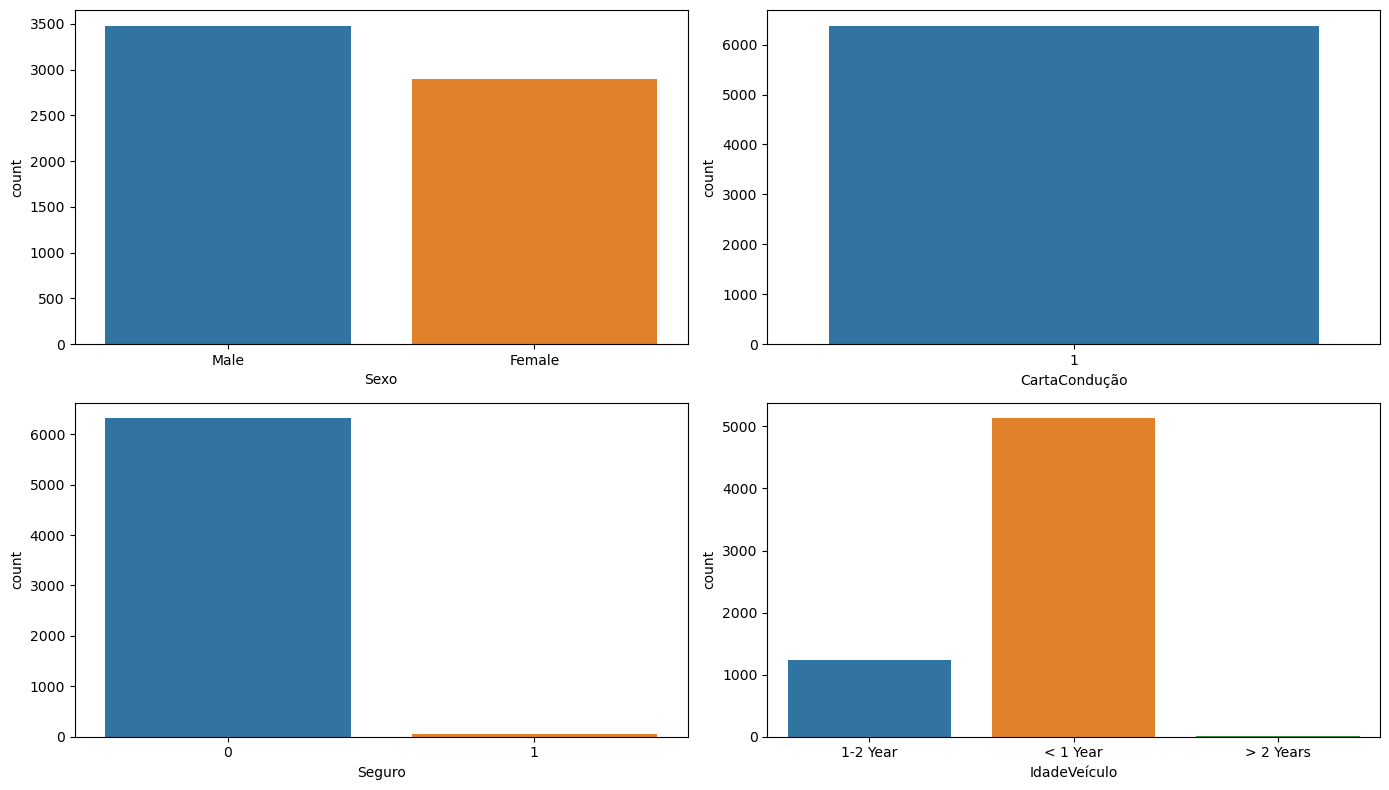

In [58]:
# Podemos observar as informações acimas todas de uma vez através de gráficos

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = jovens_desinteressados, x="Sexo", ax=axes[0][0])
sns.countplot(data = jovens_desinteressados, x="CartaCondução", ax=axes[0][1])
sns.countplot(data = jovens_desinteressados, x="Seguro", ax=axes[1][0])
sns.countplot(data = jovens_desinteressados, x="IdadeVeículo", ax=axes[1][1])

plt.show()

### ANALISANDO POR TEMPO DE VIDA DO CARRO

In [59]:
sexo = jovens_desinteressados.groupby(["IdadeVeículo"]).count()["Idade"].rename('QuantidadeSexo')
cart = jovens_desinteressados.groupby(['IdadeVeículo']).sum()['CartaCondução'].rename('SomaCarteira')
carmedia =jovens_desinteressados.groupby(['IdadeVeículo']).mean()['CartaCondução'].rename('MédiaCarteira')
seguro = jovens_desinteressados.groupby(['IdadeVeículo']).sum()['Seguro'].rename('SomaSeguro')
mediaseguro = jovens_desinteressados.groupby(['IdadeVeículo']).mean()['Seguro'].rename('MédiaSeguro')
total = jovens_desinteressados.groupby(['IdadeVeículo']).sum()['ValorPagarAno'].rename('SomaTotal')
mediatotal = jovens_desinteressados.groupby(['IdadeVeículo']).median()['ValorPagarAno'].rename('MédiaTotal')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaCarteira':cart,'MédiaCarteira':carmedia,'SomaSeguro':seguro,'MédiaSeguro':mediaseguro,'SomaTotal':total,'MédiaTotal':mediatotal})
dados_usuarios ['SomaTotal'] = dados_usuarios['SomaTotal'].map("${:,.2f}".format)
dados_usuarios ["MédiaTotal"] = dados_usuarios["MédiaTotal"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaCarteira,MédiaCarteira,SomaSeguro,MédiaSeguro,SomaTotal,MédiaTotal
IdadeVeículo,,,,,,,
< 1 Year,5129,5129,1.0,54,0.010528,"$153,084,311.00","$30,805.00"
1-2 Year,1235,1235,1.0,6,0.004858,"$30,319,102.00","$27,581.00"
> 2 Years,10,10,1.0,0,0.000000,"$194,805.00","$13,972.00"


### ANALISANDO POR VEICÚLO DEFEITUOSO OU NÃO

In [60]:
sexo = jovens_desinteressados.groupby(["VeiculoDanificado"]).count()["Idade"].rename('QuantidadeSexo')
cart = jovens_desinteressados.groupby(['VeiculoDanificado']).sum()['CartaCondução'].rename('SomaCarteira')
carmedia =jovens_desinteressados.groupby(['VeiculoDanificado']).mean()['CartaCondução'].rename('MédiaCarteira')
seguro = jovens_desinteressados.groupby(['VeiculoDanificado']).sum()['Seguro'].rename('SomaSeguro')
mediaseguro = jovens_desinteressados.groupby(['VeiculoDanificado']).mean()['Seguro'].rename('MédiaSeguro')
total = jovens_desinteressados.groupby(['VeiculoDanificado']).sum()['ValorPagarAno'].rename('SomaTotal')
mediatotal = jovens_desinteressados.groupby(['VeiculoDanificado']).median()['ValorPagarAno'].rename('MédiaTotal')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaCarteira':cart,'MédiaCarteira':carmedia,'SomaSeguro':seguro,'MédiaSeguro':mediaseguro,'SomaTotal':total,'MédiaTotal':mediatotal})
dados_usuarios ['SomaTotal'] = dados_usuarios['SomaTotal'].map("${:,.2f}".format)
dados_usuarios ["MédiaTotal"] = dados_usuarios["MédiaTotal"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaCarteira,MédiaCarteira,SomaSeguro,MédiaSeguro,SomaTotal,MédiaTotal
VeiculoDanificado,,,,,,,
Yes,6010,6010,1.0,34,0.005657,"$174,887,386.00","$30,382.50"
No,364,364,1.0,26,0.071429,"$8,710,832.00","$27,566.00"


### ADULTOS QUE TIVERAM INTERESSE NO SEGURO

In [61]:
adultos = interessados.query('Idade > 29 and Idade <= 59')
adultos['Idade'].value_counts().sum()

143338

### ANALSIANDO POR SEXO 

In [62]:
sexo = adultos.groupby(["Sexo"]).count()["Idade"].rename('QuantidadeSexo')
cart = adultos.groupby(['Sexo']).sum()['CartaCondução'].rename('SomaCarteira')
carmedia =adultos.groupby(['Sexo']).mean()['CartaCondução'].rename('MédiaCarteira')
seguro = adultos.groupby(['Sexo']).sum()['Seguro'].rename('SomaSeguro')
mediaseguro = adultos.groupby(['Sexo']).mean()['Seguro'].rename('MédiaSeguro')
total = adultos.groupby(['Sexo']).sum()['ValorPagarAno'].rename('SomaTotal')
mediatotal = adultos.groupby(['Sexo']).median()['ValorPagarAno'].rename('MédiaTotal')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaCarteira':cart,'MédiaCarteira':carmedia,'SomaSeguro':seguro,'MédiaSeguro':mediaseguro,'SomaTotal':total,'MédiaTotal':mediatotal})
dados_usuarios ['SomaTotal'] = dados_usuarios['SomaTotal'].map("${:,.2f}".format)
dados_usuarios ["MédiaTotal"] = dados_usuarios["MédiaTotal"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaCarteira,MédiaCarteira,SomaSeguro,MédiaSeguro,SomaTotal,MédiaTotal
Sexo,,,,,,,
Male,86508,86370,0.998405,31999,0.369896,"$2,573,984,433.00","$31,877.00"
Female,56830,56791,0.999314,23297,0.409942,"$1,697,490,302.00","$31,815.50"


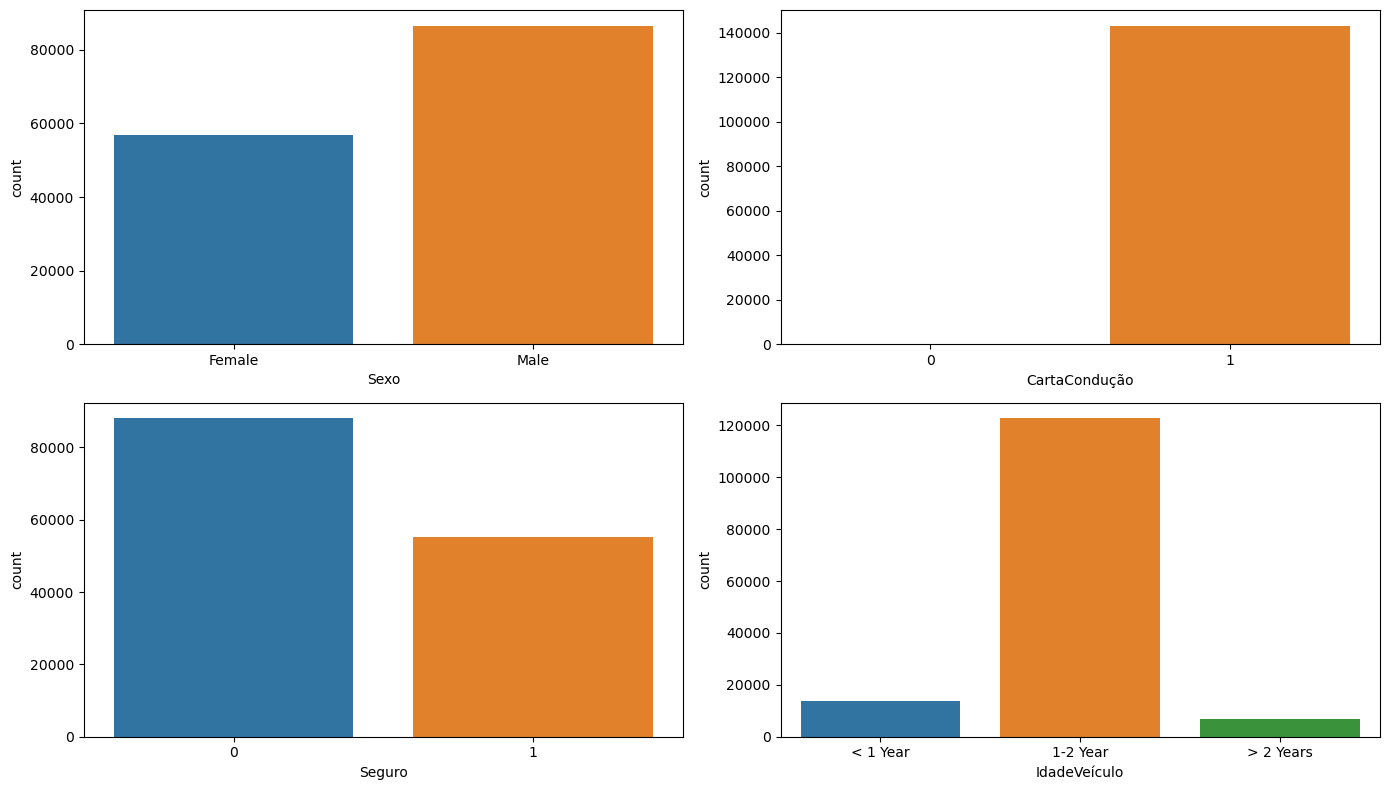

In [63]:
# Podemos observar as informações acimas todas de uma vez através de gráficos

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = adultos, x="Sexo", ax=axes[0][0])
sns.countplot(data = adultos, x="CartaCondução", ax=axes[0][1])
sns.countplot(data = adultos, x="Seguro", ax=axes[1][0])
sns.countplot(data = adultos, x="IdadeVeículo", ax=axes[1][1])

plt.show()

### ANALISANDO POR TEMPO DE VIDA DO CARRO

In [64]:
sexo = adultos.groupby(["IdadeVeículo"]).count()["Idade"].rename('QuantidadeSexo')
cart = adultos.groupby(['IdadeVeículo']).sum()['CartaCondução'].rename('SomaCarteira')
carmedia =adultos.groupby(['IdadeVeículo']).mean()['CartaCondução'].rename('MédiaCarteira')
seguro = adultos.groupby(['IdadeVeículo']).sum()['Seguro'].rename('SomaSeguro')
mediaseguro = adultos.groupby(['IdadeVeículo']).mean()['Seguro'].rename('MédiaSeguro')
total = adultos.groupby(['IdadeVeículo']).sum()['ValorPagarAno'].rename('SomaTotal')
mediatotal = adultos.groupby(['IdadeVeículo']).median()['ValorPagarAno'].rename('MédiaTotal')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaCarteira':cart,'MédiaCarteira':carmedia,'SomaSeguro':seguro,'MédiaSeguro':mediaseguro,'SomaTotal':total,'MédiaTotal':mediatotal})
dados_usuarios ['SomaTotal'] = dados_usuarios['SomaTotal'].map("${:,.2f}".format)
dados_usuarios ["MédiaTotal"] = dados_usuarios["MédiaTotal"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaCarteira,MédiaCarteira,SomaSeguro,MédiaSeguro,SomaTotal,MédiaTotal
IdadeVeículo,,,,,,,
1-2 Year,122704,122532,0.998598,46596,0.379743,"$3,666,284,327.00","$31,979.50"
< 1 Year,13705,13705,1.000000,8667,0.632397,"$372,070,800.00","$29,281.00"
> 2 Years,6929,6924,0.999278,33,0.004763,"$233,119,608.00","$36,215.00"


### ANALISANDO POR VEICÚLO DEFEITUOSO OU NÃO

In [65]:
sexo = adultos.groupby(["VeiculoDanificado"]).count()["Idade"].rename('QuantidadeSexo')
cart = adultos.groupby(['VeiculoDanificado']).sum()['CartaCondução'].rename('SomaCarteira')
carmedia =adultos.groupby(['VeiculoDanificado']).mean()['CartaCondução'].rename('MédiaCarteira')
seguro = adultos.groupby(['VeiculoDanificado']).sum()['Seguro'].rename('SomaSeguro')
mediaseguro = adultos.groupby(['VeiculoDanificado']).mean()['Seguro'].rename('MédiaSeguro')
total = adultos.groupby(['VeiculoDanificado']).sum()['ValorPagarAno'].rename('SomaTotal')
mediatotal = adultos.groupby(['VeiculoDanificado']).median()['ValorPagarAno'].rename('MédiaTotal')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaCarteira':cart,'MédiaCarteira':carmedia,'SomaSeguro':seguro,'MédiaSeguro':mediaseguro,'SomaTotal':total,'MédiaTotal':mediatotal})
dados_usuarios ['SomaTotal'] = dados_usuarios['SomaTotal'].map("${:,.2f}".format)
dados_usuarios ["MédiaTotal"] = dados_usuarios["MédiaTotal"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaCarteira,MédiaCarteira,SomaSeguro,MédiaSeguro,SomaTotal,MédiaTotal
VeiculoDanificado,,,,,,,
Yes,81768,81647,0.99852,4080,0.049897,"$2,474,645,851.00","$32,584.00"
No,61570,61514,0.99909,51216,0.831834,"$1,796,828,884.00","$30,967.00"


### ADULTOS QUE NÃO TIVERAM INTERESSE NO SEGURO

In [66]:
adultos_desinteressados = desinteressados.query('Idade > 29 and Idade <= 59')
adultos_desinteressados['Idade'].value_counts().sum()

35650

### ANALSIANDO POR SEXO 

In [67]:
sexo = adultos_desinteressados.groupby(["Sexo"]).count()["Idade"].rename('QuantidadeSexo')
cart = adultos_desinteressados.groupby(['Sexo']).sum()['CartaCondução'].rename('SomaCarteira')
carmedia =adultos_desinteressados.groupby(['Sexo']).mean()['CartaCondução'].rename('MédiaCarteira')
seguro = adultos_desinteressados.groupby(['Sexo']).sum()['Seguro'].rename('SomaSeguro')
mediaseguro = adultos_desinteressados.groupby(['Sexo']).mean()['Seguro'].rename('MédiaSeguro')
total = adultos_desinteressados.groupby(['Sexo']).sum()['ValorPagarAno'].rename('SomaTotal')
mediatotal = adultos_desinteressados.groupby(['Sexo']).median()['ValorPagarAno'].rename('MédiaTotal')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaCarteira':cart,'MédiaCarteira':carmedia,'SomaSeguro':seguro,'MédiaSeguro':mediaseguro,'SomaTotal':total,'MédiaTotal':mediatotal})
dados_usuarios ['SomaTotal'] = dados_usuarios['SomaTotal'].map("${:,.2f}".format)
dados_usuarios ["MédiaTotal"] = dados_usuarios["MédiaTotal"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaCarteira,MédiaCarteira,SomaSeguro,MédiaSeguro,SomaTotal,MédiaTotal
Sexo,,,,,,,
Male,22068,22051,0.999230,58,0.002628,"$696,746,159.00","$33,090.00"
Female,13582,13576,0.999558,31,0.002282,"$430,598,032.00","$33,377.00"


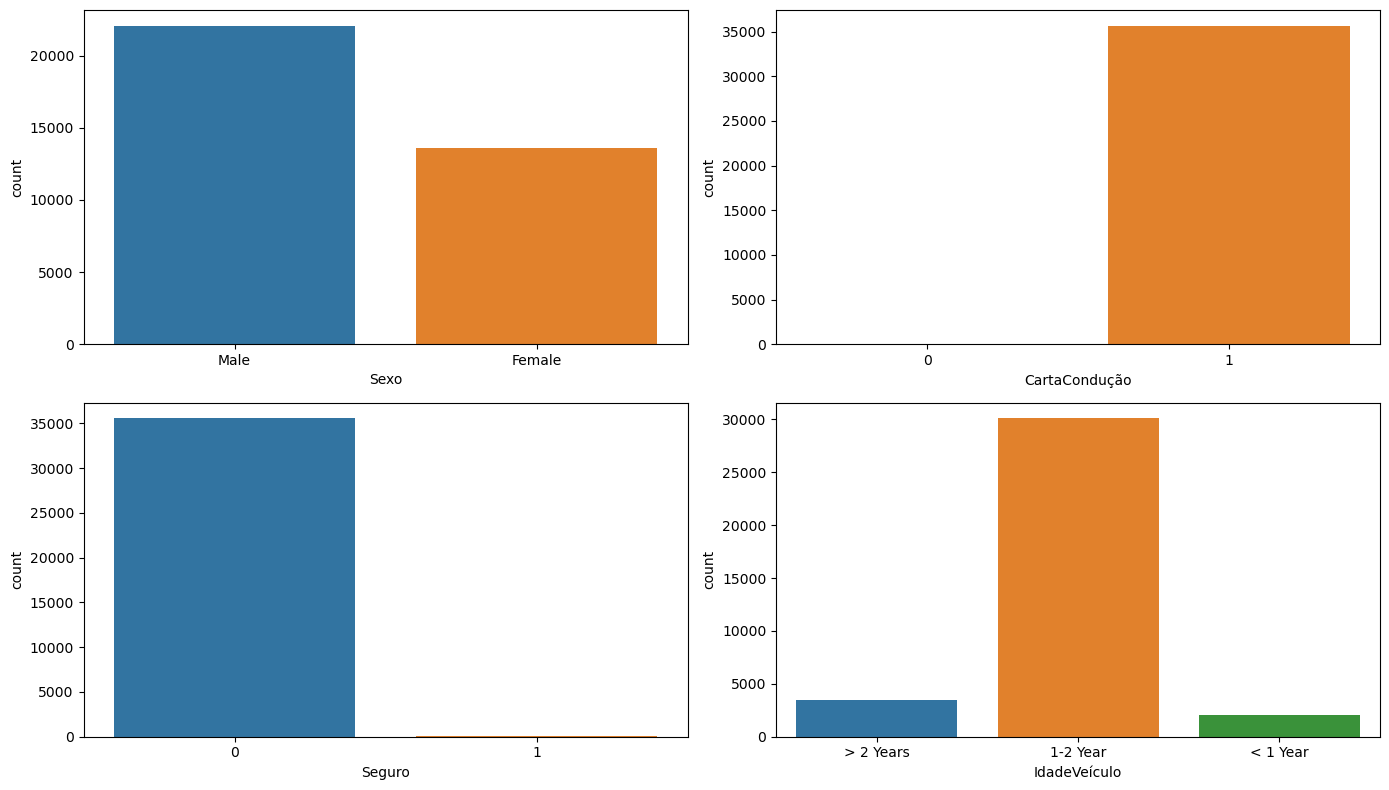

In [68]:
# Podemos observar as informações acimas todas de uma vez através de gráficos

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = adultos_desinteressados, x="Sexo", ax=axes[0][0])
sns.countplot(data = adultos_desinteressados, x="CartaCondução", ax=axes[0][1])
sns.countplot(data = adultos_desinteressados, x="Seguro", ax=axes[1][0])
sns.countplot(data = adultos_desinteressados, x="IdadeVeículo", ax=axes[1][1])

plt.show()

### ANALISANDO POR TEMPO DE VIDA DO CARRO

In [69]:
sexo = adultos_desinteressados.groupby(["IdadeVeículo"]).count()["Idade"].rename('QuantidadeSexo')
cart = adultos_desinteressados.groupby(['IdadeVeículo']).sum()['CartaCondução'].rename('SomaCarteira')
carmedia =adultos_desinteressados.groupby(['IdadeVeículo']).mean()['CartaCondução'].rename('MédiaCarteira')
seguro = adultos_desinteressados.groupby(['IdadeVeículo']).sum()['Seguro'].rename('SomaSeguro')
mediaseguro = adultos_desinteressados.groupby(['IdadeVeículo']).mean()['Seguro'].rename('MédiaSeguro')
total = adultos_desinteressados.groupby(['IdadeVeículo']).sum()['ValorPagarAno'].rename('SomaTotal')
mediatotal = adultos_desinteressados.groupby(['IdadeVeículo']).median()['ValorPagarAno'].rename('MédiaTotal')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaCarteira':cart,'MédiaCarteira':carmedia,'SomaSeguro':seguro,'MédiaSeguro':mediaseguro,'SomaTotal':total,'MédiaTotal':mediatotal})
dados_usuarios ['SomaTotal'] = dados_usuarios['SomaTotal'].map("${:,.2f}".format)
dados_usuarios ["MédiaTotal"] = dados_usuarios["MédiaTotal"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaCarteira,MédiaCarteira,SomaSeguro,MédiaSeguro,SomaTotal,MédiaTotal
IdadeVeículo,,,,,,,
1-2 Year,30090,30068,0.999269,80,0.002659,"$933,726,406.00","$32,750.00"
> 2 Years,3496,3495,0.999714,1,0.000286,"$132,238,002.00","$38,753.00"
< 1 Year,2064,2064,1.000000,8,0.003876,"$61,379,783.00","$31,468.00"


### ANALISANDO POR VEICÚLO DEFEITUOSO OU NÃO

In [70]:
sexo = adultos_desinteressados.groupby(["VeiculoDanificado"]).count()["Idade"].rename('QuantidadeSexo')
cart = adultos_desinteressados.groupby(['VeiculoDanificado']).sum()['CartaCondução'].rename('SomaCarteira')
carmedia =adultos_desinteressados.groupby(['VeiculoDanificado']).mean()['CartaCondução'].rename('MédiaCarteira')
seguro = adultos_desinteressados.groupby(['VeiculoDanificado']).sum()['Seguro'].rename('SomaSeguro')
mediaseguro = adultos_desinteressados.groupby(['VeiculoDanificado']).mean()['Seguro'].rename('MédiaSeguro')
total = adultos_desinteressados.groupby(['VeiculoDanificado']).sum()['ValorPagarAno'].rename('SomaTotal')
mediatotal = adultos_desinteressados.groupby(['VeiculoDanificado']).median()['ValorPagarAno'].rename('MédiaTotal')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaCarteira':cart,'MédiaCarteira':carmedia,'SomaSeguro':seguro,'MédiaSeguro':mediaseguro,'SomaTotal':total,'MédiaTotal':mediatotal})
dados_usuarios ['SomaTotal'] = dados_usuarios['SomaTotal'].map("${:,.2f}".format)
dados_usuarios ["MédiaTotal"] = dados_usuarios["MédiaTotal"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaCarteira,MédiaCarteira,SomaSeguro,MédiaSeguro,SomaTotal,MédiaTotal
VeiculoDanificado,,,,,,,
Yes,35071,35048,0.999344,47,0.001340,"$1,113,435,132.00","$33,281.00"
No,579,579,1.000000,42,0.072539,"$13,909,059.00","$27,615.00"


### IDOSOS QUE TIVERAM INTERESSE NO SEGURO

In [71]:
idosos = interessados.query('Idade > 59 and Idade <= 85')
idosos['Idade'].value_counts().sum()

42097

### ANALSIANDO POR SEXO 

In [72]:
sexo = idosos.groupby(["Sexo"]).count()["Idade"].rename('QuantidadeSexo')
cart = idosos.groupby(['Sexo']).sum()['CartaCondução'].rename('SomaCarteira')
carmedia =idosos.groupby(['Sexo']).mean()['CartaCondução'].rename('MédiaCarteira')
seguro = idosos.groupby(['Sexo']).sum()['Seguro'].rename('SomaSeguro')
mediaseguro = idosos.groupby(['Sexo']).mean()['Seguro'].rename('MédiaSeguro')
total = idosos.groupby(['Sexo']).sum()['ValorPagarAno'].rename('SomaTotal')
mediatotal = idosos.groupby(['Sexo']).median()['ValorPagarAno'].rename('MédiaTotal')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaCarteira':cart,'MédiaCarteira':carmedia,'SomaSeguro':seguro,'MédiaSeguro':mediaseguro,'SomaTotal':total,'MédiaTotal':mediatotal})
dados_usuarios ['SomaTotal'] = dados_usuarios['SomaTotal'].map("${:,.2f}".format)
dados_usuarios ["MédiaTotal"] = dados_usuarios["MédiaTotal"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaCarteira,MédiaCarteira,SomaSeguro,MédiaSeguro,SomaTotal,MédiaTotal
Sexo,,,,,,,
Male,25344,24911,0.982915,10308,0.406723,"$837,996,994.00","$34,744.00"
Female,16753,16595,0.990569,6798,0.405778,"$562,675,869.00","$34,617.00"


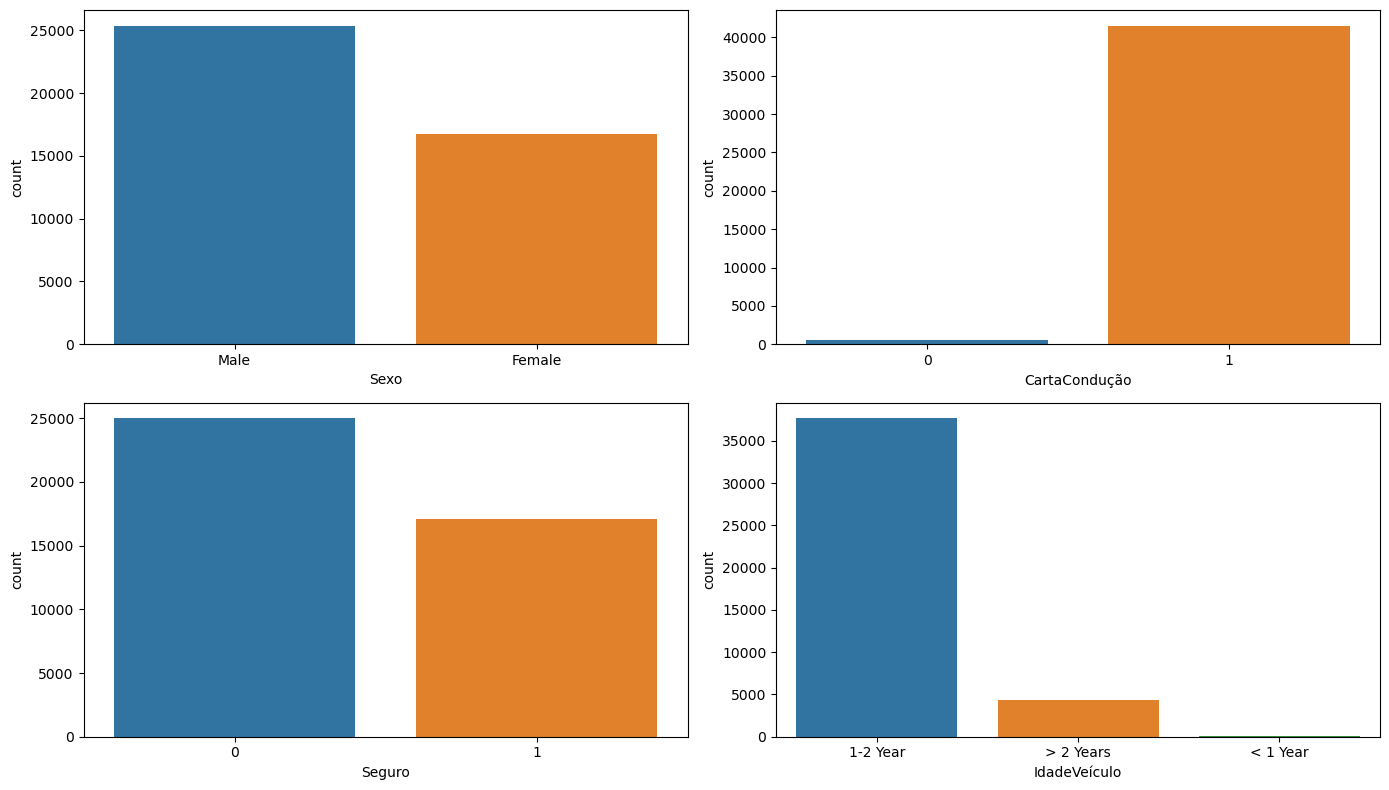

In [73]:
# Podemos observar as informações acimas todas de uma vez através de gráficos

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = idosos, x="Sexo", ax=axes[0][0])
sns.countplot(data = idosos, x="CartaCondução", ax=axes[0][1])
sns.countplot(data = idosos, x="Seguro", ax=axes[1][0])
sns.countplot(data = idosos, x="IdadeVeículo", ax=axes[1][1])

plt.show()

### ANALISANDO POR TEMPO DE VIDA DO CARRO

In [74]:
sexo = idosos.groupby(["IdadeVeículo"]).count()["Idade"].rename('QuantidadeSexo')
cart = idosos.groupby(['IdadeVeículo']).sum()['CartaCondução'].rename('SomaCarteira')
carmedia =idosos.groupby(['IdadeVeículo']).mean()['CartaCondução'].rename('MédiaCarteira')
seguro = idosos.groupby(['IdadeVeículo']).sum()['Seguro'].rename('SomaSeguro')
mediaseguro = idosos.groupby(['IdadeVeículo']).mean()['Seguro'].rename('MédiaSeguro')
total = idosos.groupby(['IdadeVeículo']).sum()['ValorPagarAno'].rename('SomaTotal')
mediatotal = idosos.groupby(['IdadeVeículo']).median()['ValorPagarAno'].rename('MédiaTotal')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaCarteira':cart,'MédiaCarteira':carmedia,'SomaSeguro':seguro,'MédiaSeguro':mediaseguro,'SomaTotal':total,'MédiaTotal':mediatotal})
dados_usuarios ['SomaTotal'] = dados_usuarios['SomaTotal'].map("${:,.2f}".format)
dados_usuarios ["MédiaTotal"] = dados_usuarios["MédiaTotal"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaCarteira,MédiaCarteira,SomaSeguro,MédiaSeguro,SomaTotal,MédiaTotal
IdadeVeículo,,,,,,,
1-2 Year,37672,37126,0.985506,17083,0.453467,"$1,243,816,273.00","$34,378.00"
> 2 Years,4327,4282,0.989600,12,0.002773,"$156,414,657.00","$37,916.00"
< 1 Year,98,98,1.000000,11,0.112245,"$441,933.00","$2,630.00"


### ANALISANDO POR VEICÚLO DEFEITUOSO OU NÃO

In [75]:
sexo = idosos.groupby(["VeiculoDanificado"]).count()["Idade"].rename('QuantidadeSexo')
cart = idosos.groupby(['VeiculoDanificado']).sum()['CartaCondução'].rename('SomaCarteira')
carmedia =idosos.groupby(['VeiculoDanificado']).mean()['CartaCondução'].rename('MédiaCarteira')
seguro = idosos.groupby(['VeiculoDanificado']).sum()['Seguro'].rename('SomaSeguro')
mediaseguro = idosos.groupby(['VeiculoDanificado']).mean()['Seguro'].rename('MédiaSeguro')
total = idosos.groupby(['VeiculoDanificado']).sum()['ValorPagarAno'].rename('SomaTotal')
mediatotal = idosos.groupby(['VeiculoDanificado']).median()['ValorPagarAno'].rename('MédiaTotal')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaCarteira':cart,'MédiaCarteira':carmedia,'SomaSeguro':seguro,'MédiaSeguro':mediaseguro,'SomaTotal':total,'MédiaTotal':mediatotal})
dados_usuarios ['SomaTotal'] = dados_usuarios['SomaTotal'].map("${:,.2f}".format)
dados_usuarios ["MédiaTotal"] = dados_usuarios["MédiaTotal"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaCarteira,MédiaCarteira,SomaSeguro,MédiaSeguro,SomaTotal,MédiaTotal
VeiculoDanificado,,,,,,,
Yes,24100,23709,0.983776,1700,0.070539,"$807,614,266.00","$35,076.00"
No,17997,17797,0.988887,15406,0.856032,"$593,058,597.00","$34,215.00"


### IDOSOS QUE NÃO TIVERAM INTERESSE NO SEGURO

In [76]:
idosos_desinteressados = desinteressados.query('Idade > 59 and Idade <= 85')
idosos_desinteressados['Idade'].value_counts().sum()

4661

### ANALSIANDO POR SEXO 

In [77]:
sexo = idosos_desinteressados.groupby(["Sexo"]).count()["Idade"].rename('QuantidadeSexo')
cart = idosos_desinteressados.groupby(['Sexo']).sum()['CartaCondução'].rename('SomaCarteira')
carmedia =idosos_desinteressados.groupby(['Sexo']).mean()['CartaCondução'].rename('MédiaCarteira')
seguro = idosos_desinteressados.groupby(['Sexo']).sum()['Seguro'].rename('SomaSeguro')
mediaseguro = idosos_desinteressados.groupby(['Sexo']).mean()['Seguro'].rename('MédiaSeguro')
total = idosos_desinteressados.groupby(['Sexo']).sum()['ValorPagarAno'].rename('SomaTotal')
mediatotal = idosos_desinteressados.groupby(['Sexo']).median()['ValorPagarAno'].rename('MédiaTotal')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaCarteira':cart,'MédiaCarteira':carmedia,'SomaSeguro':seguro,'MédiaSeguro':mediaseguro,'SomaTotal':total,'MédiaTotal':mediatotal})
dados_usuarios ['SomaTotal'] = dados_usuarios['SomaTotal'].map("${:,.2f}".format)
dados_usuarios ["MédiaTotal"] = dados_usuarios["MédiaTotal"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaCarteira,MédiaCarteira,SomaSeguro,MédiaSeguro,SomaTotal,MédiaTotal
Sexo,,,,,,,
Male,2965,2955,0.996627,4,0.001349,"$106,029,129.00","$36,499.00"
Female,1696,1688,0.995283,5,0.002948,"$59,150,088.00","$35,927.50"


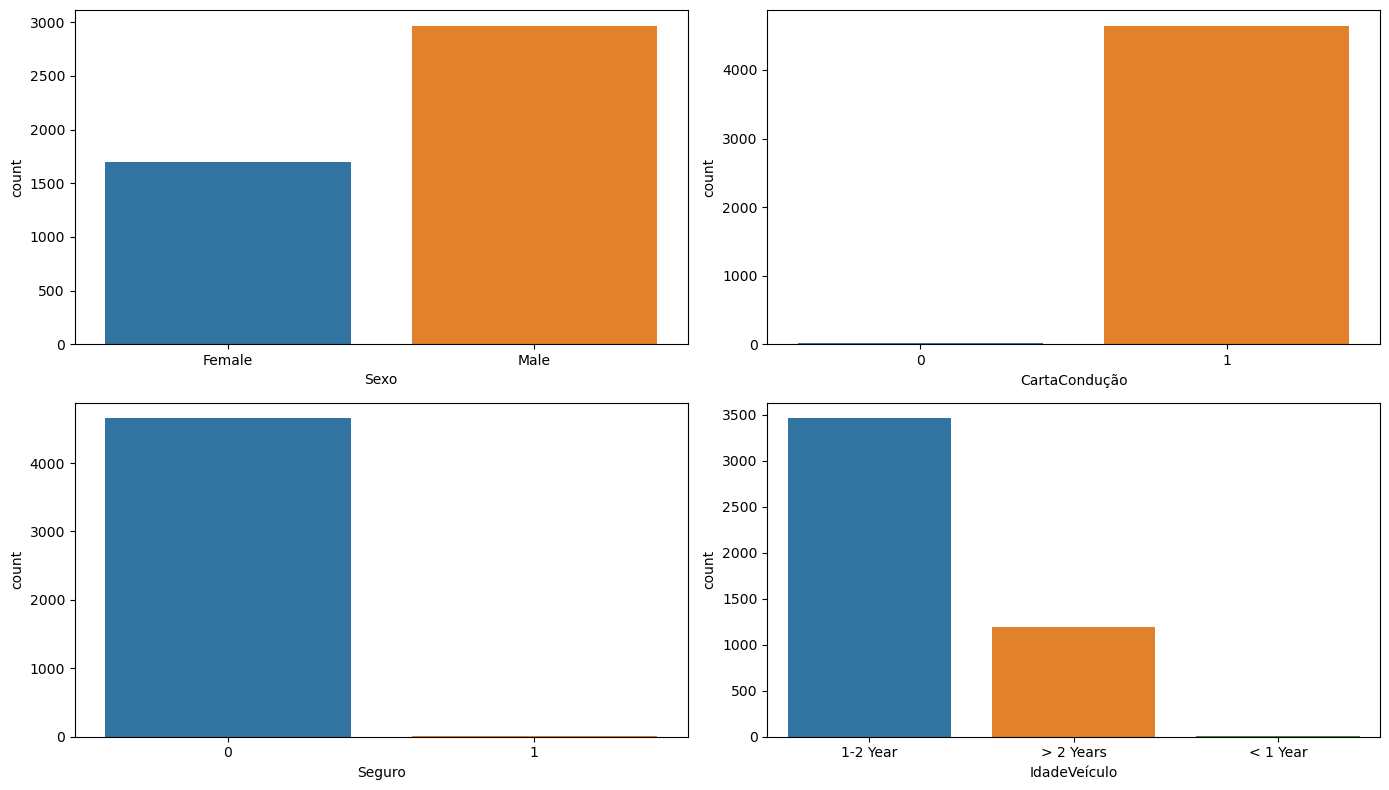

In [78]:
# Podemos observar as informações acimas todas de uma vez através de gráficos

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = idosos_desinteressados, x="Sexo", ax=axes[0][0])
sns.countplot(data = idosos_desinteressados, x="CartaCondução", ax=axes[0][1])
sns.countplot(data = idosos_desinteressados, x="Seguro", ax=axes[1][0])
sns.countplot(data = idosos_desinteressados, x="IdadeVeículo", ax=axes[1][1])

plt.show()

### ANALISANDO POR TEMPO DE VIDA DO CARRO

In [79]:
sexo = idosos_desinteressados.groupby(["IdadeVeículo"]).count()["Idade"].rename('QuantidadeSexo')
cart = idosos_desinteressados.groupby(['IdadeVeículo']).sum()['CartaCondução'].rename('SomaCarteira')
carmedia =idosos_desinteressados.groupby(['IdadeVeículo']).mean()['CartaCondução'].rename('MédiaCarteira')
seguro = idosos_desinteressados.groupby(['IdadeVeículo']).sum()['Seguro'].rename('SomaSeguro')
mediaseguro = idosos_desinteressados.groupby(['IdadeVeículo']).mean()['Seguro'].rename('MédiaSeguro')
total = idosos_desinteressados.groupby(['IdadeVeículo']).sum()['ValorPagarAno'].rename('SomaTotal')
mediatotal = idosos_desinteressados.groupby(['IdadeVeículo']).median()['ValorPagarAno'].rename('MédiaTotal')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaCarteira':cart,'MédiaCarteira':carmedia,'SomaSeguro':seguro,'MédiaSeguro':mediaseguro,'SomaTotal':total,'MédiaTotal':mediatotal})
dados_usuarios ['SomaTotal'] = dados_usuarios['SomaTotal'].map("${:,.2f}".format)
dados_usuarios ["MédiaTotal"] = dados_usuarios["MédiaTotal"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaCarteira,MédiaCarteira,SomaSeguro,MédiaSeguro,SomaTotal,MédiaTotal
IdadeVeículo,,,,,,,
1-2 Year,3458,3444,0.995951,9,0.002603,"$117,478,510.00","$34,835.00"
> 2 Years,1194,1190,0.996650,0,0.000000,"$47,347,703.00","$40,807.00"
< 1 Year,9,9,1.000000,0,0.000000,"$353,004.00","$44,235.00"


### ANALISANDO POR VEICÚLO DEFEITUOSO OU NÃO

In [80]:
sexo = idosos_desinteressados.groupby(["VeiculoDanificado"]).count()["Idade"].rename('QuantidadeSexo')
cart = idosos_desinteressados.groupby(['VeiculoDanificado']).sum()['CartaCondução'].rename('SomaCarteira')
carmedia =idosos_desinteressados.groupby(['VeiculoDanificado']).mean()['CartaCondução'].rename('MédiaCarteira')
seguro = idosos_desinteressados.groupby(['VeiculoDanificado']).sum()['Seguro'].rename('SomaSeguro')
mediaseguro = idosos_desinteressados.groupby(['VeiculoDanificado']).mean()['Seguro'].rename('MédiaSeguro')
total = idosos_desinteressados.groupby(['VeiculoDanificado']).sum()['ValorPagarAno'].rename('SomaTotal')
mediatotal = idosos_desinteressados.groupby(['VeiculoDanificado']).median()['ValorPagarAno'].rename('MédiaTotal')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaCarteira':cart,'MédiaCarteira':carmedia,'SomaSeguro':seguro,'MédiaSeguro':mediaseguro,'SomaTotal':total,'MédiaTotal':mediatotal})
dados_usuarios ['SomaTotal'] = dados_usuarios['SomaTotal'].map("${:,.2f}".format)
dados_usuarios ["MédiaTotal"] = dados_usuarios["MédiaTotal"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaCarteira,MédiaCarteira,SomaSeguro,MédiaSeguro,SomaTotal,MédiaTotal
VeiculoDanificado,,,,,,,
Yes,4622,4604,0.996106,5,0.001082,"$164,165,288.00","$36,378.50"
No,39,39,1.000000,4,0.102564,"$1,013,929.00","$28,724.00"


# MACHINE LEARNING

## PRÉ-PROCESSAMENTO

### EXCLUINDO VARIAVEIS NÃO UTILIZAVEIS

In [81]:
df_traduzida.head()

,Sexo,Idade,CartaCondução,CódigoRegião,Seguro,IdadeVeículo,VeiculoDanificado,ValorPagarAno,PolíticaCanal,DiasAssociado,Resposta
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [82]:
del df_traduzida['PolíticaCanal']
del df_traduzida['IdadeVeículo']
del df_traduzida['Seguro']

## encoder

In [83]:
# Cria o encoder
lb = LabelEncoder()

# Aplica o encoder nas variáveis que estão com string
df_traduzida['Sexo'] = lb.fit_transform(df_traduzida['Sexo'])
df_traduzida['VeiculoDanificado'] = lb.fit_transform(df_traduzida['VeiculoDanificado'])

# Remove valores missing eventualmente gerados
df_traduzida.dropna(inplace = True)

### Separa X e y

In [84]:

X = df_traduzida.iloc[:, :-1]
y = df_traduzida.iloc[:, -1]

Contagem de classes antes do balanceamento:
0    334155
1     46685
Name: Resposta, dtype: int64

Contagem de classes após o balanceamento:
1    334155
0    334155
Name: Resposta, dtype: int64


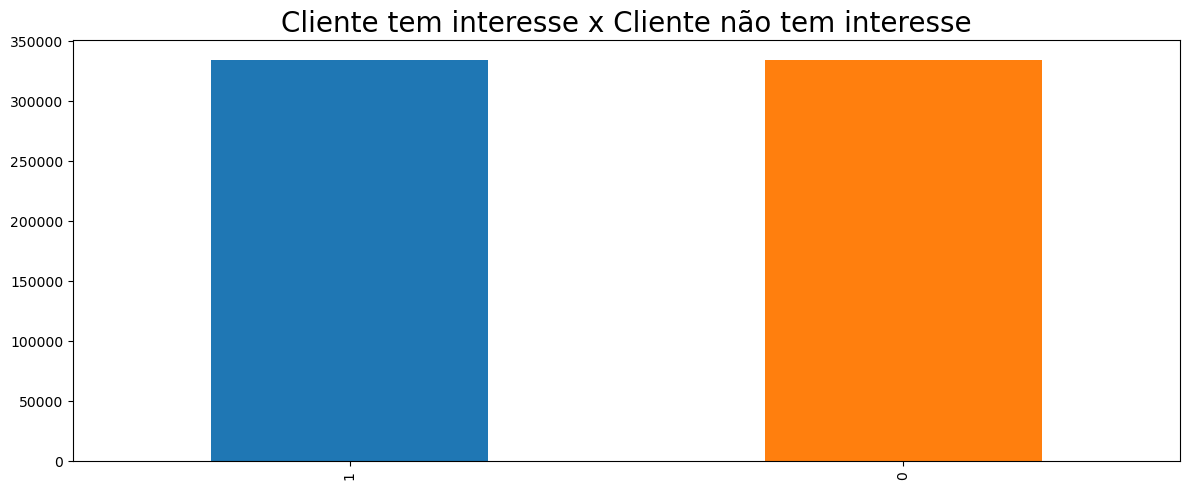

In [85]:
# Seed para reproduzir o mesmo resultado
seed = 100

# Cria o balanceador SMOTE
smote_bal = SMOTE(random_state=seed)

# Verifica a contagem de classes antes do balanceamento
print("Contagem de classes antes do balanceamento:")
print(y.value_counts())

# Aplica o balanceador
X_res, y_res = smote_bal.fit_resample(X, y)

# Verifica a contagem de classes após o balanceamento
print("\nContagem de classes após o balanceamento:")
print(pd.Series(y_res).value_counts())


# Visualizando o balanceamento da variável TARGET
plt.rcParams["figure.figsize"] = [12.00, 5.00]
plt.rcParams["figure.autolayout"] = True
y_res.value_counts().plot(kind='bar', title='Cliente tem interesse x Cliente não tem interesse',color = ['#1F77B4', '#FF7F0E']);

In [86]:
X.shape

(380840, 7)

In [87]:
X_res.shape

(668310, 7)

In [88]:
y.shape

(380840,)

In [89]:
y_res.shape

(668310,)

### VARIAVEIS MAIS IMPORTANTES

In [90]:
from sklearn.ensemble import ExtraTreesClassifier

# Criação do Modelo - Feature Selection
modelo = ExtraTreesClassifier()
modelo.fit(X, y)

ExtraTreesClassifier()

In [91]:
# Print dos Resultados
print(df_traduzida.columns[0:12])
print(modelo.feature_importances_)

Index(['Sexo', 'Idade', 'CartaCondução', 'CódigoRegião', 'VeiculoDanificado',
       'ValorPagarAno', 'DiasAssociado', 'Resposta'],
      dtype='object')
[0.00245061 0.16726652 0.00034456 0.08850091 0.12164195 0.30453586
 0.31525958]


# Random Forest

In [92]:
# SEPRANDO AS VARIAVEIS PARA TREINAMENTO

# Train Test Split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.3, random_state=42)

In [93]:
#Random Forest Regressor:
#from sklearn.ensemble import RandomForestClassifier
modelo2 = RandomForestClassifier()
modelo2 = modelo2.fit(X_train, y_train)

#Prediction:
y_predito = modelo2.predict(X_test)

In [94]:
# Avaliando as previsões
accuracy = accuracy_score(y_test, y_predito)
print("Acurácia: %.2f%%" % (accuracy * 100.0))

Acurácia: 85.37%


In [95]:
Sexo = 0
Idade = 44
CartaCondução = 0
CódigoRegião = 28
VeiculoDanificado = 0
ValorPagarAno = 3445.0
DiasAssociado = 21


parametro = [[Sexo,Idade,CartaCondução,CódigoRegião,VeiculoDanificado,ValorPagarAno,DiasAssociado]]


fazendo_previsao = modelo2.predict(parametro)
probabilidade = modelo2.predict_proba(parametro)


if (fazendo_previsao == 0).any():
    print('CLIENTE TEM INTERESSE!')
    print('A SUA PROBABILIDADE DE INTERESSE É DE:',probabilidade)

else:
    
    print('CLIENTE NÃO TEM INTERESSE!')
    print('A SUA PROBABILIDADE DE FALTA DE INTERESSE É DE:',probabilidade)

CLIENTE TEM INTERESSE!
A SUA PROBABILIDADE DE INTERESSE É DE: [[0.95 0.05]]


In [96]:
#Comando de Salvamento da Máquina Preditiva
import pickle 
pickle_out = open("maquina_preditiva_interesse_cliente.pkl", mode = "wb") 
pickle.dump(modelo2, pickle_out) 
pickle_out.close() 